<a href="https://colab.research.google.com/github/bidwatrajpokhrel/MLP-HyperparamOptimization/blob/master/4_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import display

In [ ]:
#from google.colab import drive # mounts the google drive for a new notebook 
#drive.mount('/content/drive')

In [ ]:
# load the 2 npy files created by the process_yale_images.ipynb 
from numpy import load
import numpy as np
path = '/content/drive/My Drive/BidwatPhotosSample/'
# load array
y = load(path + 'yaleExtB_target.npy')
X  = load(path + 'yaleExtB_data.npy')

In [ ]:
from sklearn.model_selection import train_test_split # loads functions from the ML library sklearn 
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from datetime import datetime
import pandas as pd

In [ ]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
# PCA 
nof_prin_components = 200  # PARAMETER for optimisation in expereiments
pca = PCA(n_components=nof_prin_components, whiten=True).fit(X_train)
# applies PCA to the train and test images to calculate the principal components
X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)
X_pca = pca.transform(X)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'hidden_layer_sizes': list(range(500, 1501, 50)),
    'solver':['lbfgs', 'sgd'],
    'activation':['logistic', 'tanh'],
    'batch_size': ['400','450','500'],
    'learning_rate_init': [0.01],
    'max_iter': [300]
}

In [ ]:
clf = GridSearchCV(MLPClassifier(), params, n_jobs=-1, cv=10, return_train_score=True, verbose=10)

In [ ]:
start = datetime.now()
a = clf.fit(X_pca, y)
stop=datetime.now()
display.Javascript("google.colab.output.setIframeHeight('200px');")

Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1

<IPython.core.display.Javascript object>

In [ ]:
print(stop-start)

0:34:05.944911


In [ ]:
a.best_params_

{'activation': 'tanh',
 'batch_size': '500',
 'hidden_layer_sizes': 1450,
 'learning_rate_init': 0.01,
 'max_iter': 300,
 'solver': 'lbfgs'}

In [ ]:
a.best_score_

0.9753333333333334

In [ ]:
MLPC=a.best_estimator_
print(MLPC)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='500', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=1450, learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
f = cross_val_score(MLPC, X_pca, y, cv=10)

In [ ]:
print("Cross Validation:", f)
print("Cross Validation Mean:", f.mean())

Cross Validation: [0.94       1.         1.         1.         1.         0.88
 0.95333333 1.         0.97333333 0.95333333]
Cross Validation Mean: 0.97


In [ ]:
import pandas as pd
pvt = pd.pivot_table(pd.DataFrame(a.cv_results_),
    values='mean_test_score', index='param_activation', columns='param_hidden_layer_sizes')

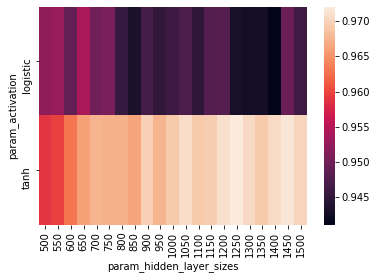

In [ ]:
import seaborn as sns  
print("\n\n")     
ax = sns.heatmap(pvt)